#Limpeza

In [1]:
# instalando a biblioteca pandas
# !pip install pandas

#importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np


###Informações adicionais

Esta pesquisa empregou uma variável binária, pagamento inadimplente (Sim = 1, Não = 0), como variável resposta. Este estudo revisou a literatura e utilizou as seguintes 23 variáveis ​​como variáveis ​​explicativas:

X1: Valor do crédito concedido (dólar NT): inclui tanto o crédito ao consumidor individual quanto o crédito familiar (complementar).

X2: Gênero (1 = masculino; 2 = feminino).

X3: Escolaridade (1 = pós-graduação; 2 = superior; 3 = ensino médio; 4 = outros).

X4: Estado civil (1 = casado; 2 = solteiro; 3 = outros).

X5: Idade (ano).

X6 - X11: Histórico de pagamentos anteriores. Acompanhamos os registros de pagamentos mensais anteriores (de abril a setembro de 2005) da seguinte forma: X6 = situação de pagamento em setembro de 2005; X7 = situação de reembolso em agosto de 2005; . . .;X11 = situação de reembolso em abril de 2005. A escala de mensuração da situação de reembolso é: -1 = pagar em dia; 1 = atraso de pagamento de um mês; 2 = atraso no pagamento há dois meses; . . .; 8 = atraso no pagamento há oito meses; 9 = atraso no pagamento por nove meses ou mais.

X12-X17: Valor do extrato da conta (dólar NT). X12 = valor do extrato da conta em setembro de 2005; X13 = valor do extrato da conta em agosto de 2005; . . .; X17 = valor do extrato da conta em abril de 2005.

X18-X23: Valor do pagamento anterior (dólar NT). X18 = valor pago em setembro de 2005; X19 = valor pago em agosto de 2005; . . .;X23 = valor pago em abril de 2005.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#origem dos dados
# link https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

dataset = "/content/drive/MyDrive/TCC/default of credit card clients.xls"
df_credit = pd.read_excel(dataset,header=1)
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#verificando o tamanho do dataset
df_credit.shape

(30000, 25)

In [5]:
#descrevendo melhor os dados
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Verificamos que os campos EDUCATION e MARRIAGE contém valores foram das especificações. Exploraremos melhor estes dados

In [6]:
df_credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
df_credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Como falamos, o campo EDUCATION contém os valores 0, 5 e 6, que não estão previstos nas especificações do arquivo. Como eles não são numerosos, agruparemos eles ao valor 4 = outros. De igual modo, o campo MARRIAGE contém valores 0 (não previstos), e, portanto, eles serão agrupados na categoria 3 = outros.

In [8]:
df_credit['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [9]:
df_credit['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [10]:
#corrigindo nomes de colunas
#PAY_0 PARA PAY_1
#default payment next month para def_pay
df_credit.rename(columns={'default payment next month':'def_pay'}, inplace=True)
df_credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [11]:
df_credit.drop(columns='ID',inplace=True)

O campo EDUCATION possui características categóricas. Alguns algoritmos, como a regressão logística, interpretam melhor dados com características ordinais (com saídas binárias 0 e 1). Assim, aplicaremos o One-Hot-Encoding sobre esse atributo.

In [12]:
df_credit['EDUCATION_CAT'] = 'none'
categorias_edu = {
    1: 'educ_pos',
    2: 'educ_universitario',
    3: 'educ_medio',
    4: 'educ_outros'
}
df_credit['EDUCATION_CAT'] = df_credit['EDUCATION'].map(categorias_edu)
edu_ohe = pd.get_dummies(df_credit['EDUCATION_CAT'])
df_credit = pd.concat([df_credit, edu_ohe], axis = 1)
df_credit.drop(columns=['EDUCATION', 'EDUCATION_CAT'], inplace=True)


In [13]:
df_credit['MARRIAGE_CAT'] = 'none'
categorias_marriage = {
    1: 'status_casado',
    2: 'status_solteiro',
    3: 'status_outros'
}
df_credit['MARRIAGE_CAT'] = df_credit['MARRIAGE'].map(categorias_marriage)
marriage_ohe = pd.get_dummies(df_credit['MARRIAGE_CAT'])
df_credit = pd.concat([df_credit, marriage_ohe], axis = 1)
df_credit.drop(columns=['MARRIAGE', 'MARRIAGE_CAT'], inplace=True)

In [14]:
# realocando a coluna 'def_pay' para a última posição
y = df_credit.pop('def_pay')
df_credit = pd.concat([df_credit, y], axis=1)


In [15]:
#verificar se tem valores nulos
df_credit.isna().sum()

LIMIT_BAL             0
SEX                   0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
educ_medio            0
educ_outros           0
educ_pos              0
educ_universitario    0
status_casado         0
status_outros         0
status_solteiro       0
def_pay               0
dtype: int64

In [16]:
df_credit.head(10)

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,educ_medio,educ_outros,educ_pos,educ_universitario,status_casado,status_outros,status_solteiro,def_pay
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,1,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,0,0,0,1,0,0,1,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,0,1,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,0,1,1,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,0,1,1,0,0,0
5,50000,1,37,0,0,0,0,0,0,64400,...,1000,800,0,0,1,0,0,0,1,0
6,500000,1,29,0,0,0,0,0,0,367965,...,13750,13770,0,0,1,0,0,0,1,0
7,100000,2,23,0,-1,-1,0,0,-1,11876,...,1687,1542,0,0,0,1,0,0,1,0
8,140000,2,28,0,0,2,0,0,0,11285,...,1000,1000,1,0,0,0,1,0,0,0
9,20000,1,35,-2,-2,-2,-2,-1,-1,0,...,1122,0,1,0,0,0,0,0,1,0


In [17]:
#Verificar os tipos de dados
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           30000 non-null  int64
 1   SEX                 30000 non-null  int64
 2   AGE                 30000 non-null  int64
 3   PAY_1               30000 non-null  int64
 4   PAY_2               30000 non-null  int64
 5   PAY_3               30000 non-null  int64
 6   PAY_4               30000 non-null  int64
 7   PAY_5               30000 non-null  int64
 8   PAY_6               30000 non-null  int64
 9   BILL_AMT1           30000 non-null  int64
 10  BILL_AMT2           30000 non-null  int64
 11  BILL_AMT3           30000 non-null  int64
 12  BILL_AMT4           30000 non-null  int64
 13  BILL_AMT5           30000 non-null  int64
 14  BILL_AMT6           30000 non-null  int64
 15  PAY_AMT1            30000 non-null  int64
 16  PAY_AMT2            30000 non-null  int6

In [18]:
#verificar correlação entre as caracteristicas e valores
atributos_selecionados = df_credit.iloc[:, [0,1,2,23,24,21,22,25,27,26,28]]
correlacao = atributos_selecionados.corr()
correlacao

,LIMIT_BAL,SEX,AGE,educ_pos,educ_universitario,educ_medio,educ_outros,status_casado,status_solteiro,status_outros,def_pay
LIMIT_BAL,1.000000,0.024755,0.144713,0.258777,-0.147530,-0.139686,0.013420,0.103701,-0.090998,-0.056001,-0.153520
SEX,0.024755,1.000000,-0.090874,-0.022750,0.025353,-0.007650,0.008498,0.030463,-0.031004,0.002687,-0.039961
AGE,0.144713,-0.090874,1.000000,-0.100423,-0.077626,0.231252,0.008982,0.449425,-0.466584,0.080767,0.013890
educ_pos,0.258777,-0.022750,-0.100423,1.000000,-0.692075,-0.326917,-0.092951,-0.153711,0.164459,-0.049482,-0.051328
educ_universitario,-0.147530,0.025353,-0.077626,-0.692075,1.000000,-0.414989,-0.117992,0.060923,-0.059692,-0.004984,0.036467
educ_medio,-0.139686,-0.007650,0.231252,-0.326917,-0.414989,1.000000,-0.055736,0.112519,-0.127678,0.068879,0.032403
educ_outros,0.013420,0.008498,0.008982,-0.092951,-0.117992,-0.055736,1.000000,0.011299,-0.012420,0.005116,-0.045703
status_casado,0.103701,0.030463,0.449425,-0.153711,0.060923,0.112519,0.011299,1.000000,-0.975033,-0.103140,0.029775
status_solteiro,-0.090998,-0.031004,-0.466584,0.164459,-0.059692,-0.127678,-0.012420,-0.975033,1.000000,-0.120311,-0.030619
status_outros,-0.056001,0.002687,0.080767,-0.049482,-0.004984,0.068879,0.005116,-0.103140,-0.120311,1.000000,0.004043


<Axes: >

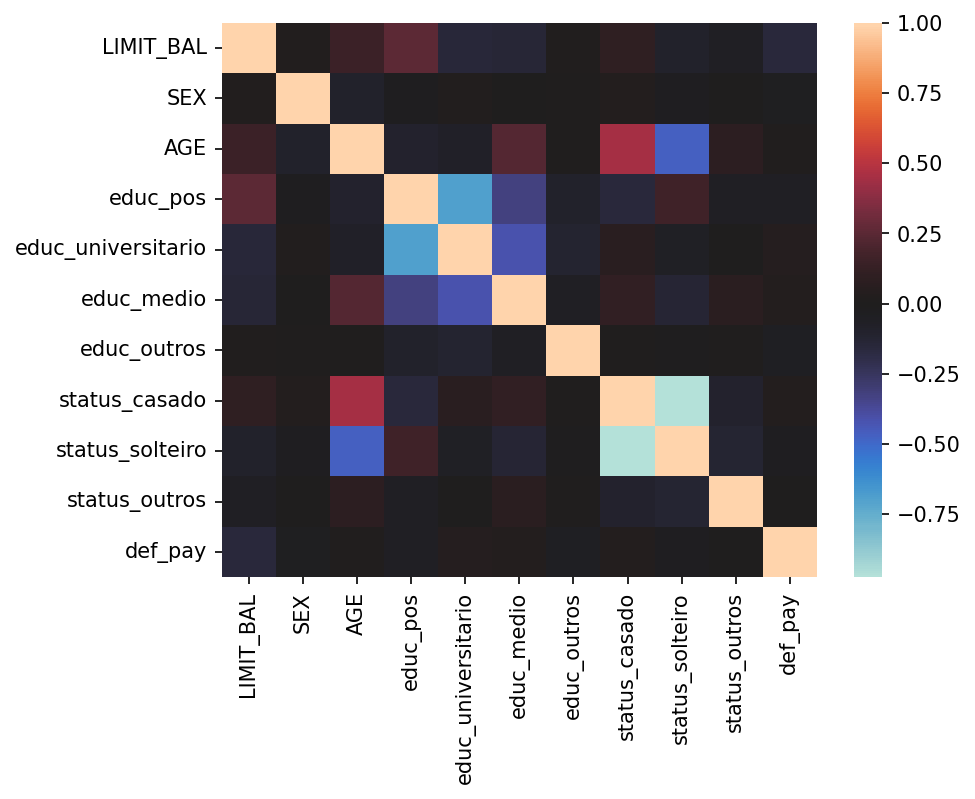

In [19]:
mpl.rcParams['figure.dpi'] = 150
sns.set_style()
%matplotlib inline

sns.heatmap(correlacao,
            xticklabels=correlacao.columns.values,
            yticklabels=correlacao.columns.values,
            center =0)

In [20]:
#separar as variáveis caracteristica e respostas
X = df_credit.drop('def_pay', axis = 1)
y = df_credit['def_pay']

In [21]:
from sklearn.feature_selection import f_classif

In [22]:
[f_stat, f_p_value] = f_classif(X,y)

In [23]:
df_credit.columns[:-1]

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'educ_medio', 'educ_outros',
       'educ_pos', 'educ_universitario', 'status_casado', 'status_outros',
       'status_solteiro'],
      dtype='object')

In [24]:
f_test_df = pd.DataFrame({'Feature': df_credit.columns[:-1],
                          'F statistic':f_stat,
                          'p value': f_p_value})

f_test_df.sort_values('p value')

,Feature,F statistic,p value
3,PAY_1,3537.714970,0.000000e+00
4,PAY_2,2239.169136,0.000000e+00
5,PAY_3,1757.466444,0.000000e+00
6,PAY_4,1476.845967,1.899297e-315
7,PAY_5,1304.591176,1.126608e-279
8,PAY_6,1085.402485,7.296740e-234
0,LIMIT_BAL,724.068539,1.302244e-157
15,PAY_AMT1,160.403810,1.146488e-36
16,PAY_AMT2,103.291524,3.166657e-24
18,PAY_AMT4,97.188000,6.830942e-23


#Balanceamento dos dados

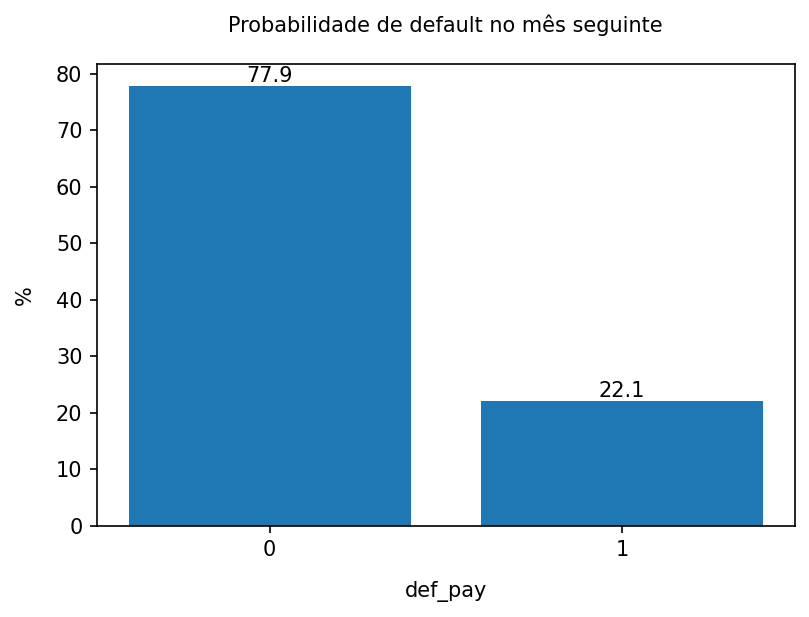

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
dados = (df_credit.def_pay.value_counts(normalize=True)*100)
x = df_credit['def_pay'].unique()
x.sort()

#plotando o gráfico
grafico_def_pay = ax.bar(x = x, height=dados, data=df_credit['def_pay'])
ax.set_title("Probabilidade de default no mês seguinte", fontsize=10, pad=15)
ax.set_xlabel('def_pay', fontsize=10, labelpad=10)
ax.set_ylabel('%', fontsize=10, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(x)

# colocando o rótulo nas barras
ax.bar_label(grafico_def_pay, fmt="%.01f", size=10, label_type="edge")
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [27]:
df_credit_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df_credit_final.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,educ_medio,educ_outros,educ_pos,educ_universitario,status_casado,status_outros,status_solteiro,def_pay
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,1,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,0,0,0,1,0,0,1,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,0,0,1,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,1069,1000,0,0,0,1,1,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,0,1,1,0,0,0


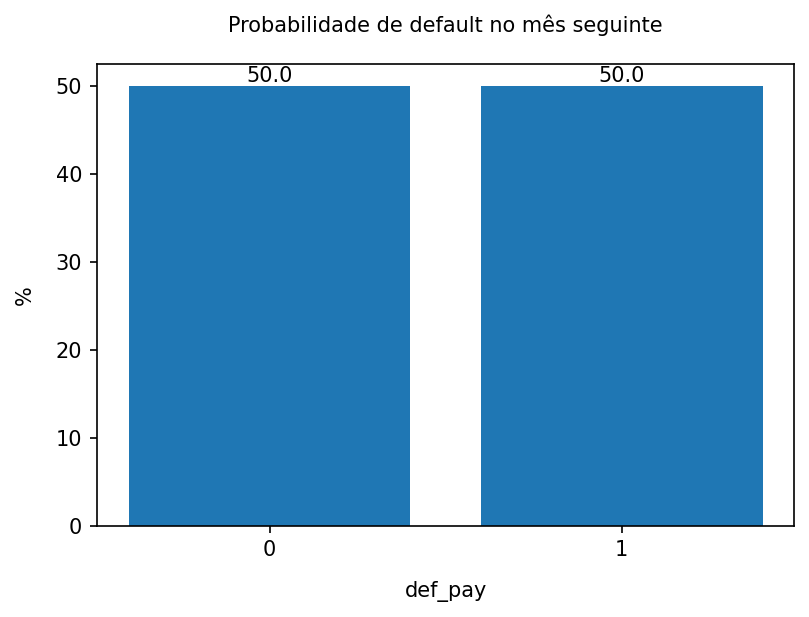

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
dados = (df_credit_final.def_pay.value_counts(normalize=True)*100)
x = df_credit_final['def_pay'].unique()

#plotando o gráfico
grafico_def_pay = ax.bar(x = x, height=dados, data=df_credit_final['def_pay'])
ax.set_title("Probabilidade de default no mês seguinte", fontsize=10, pad=15)
ax.set_xlabel('def_pay', fontsize=10, labelpad=10)
ax.set_ylabel('%', fontsize=10, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(x)

# colocando o rótulo nas barras
ax.bar_label(grafico_def_pay, fmt="%.01f", size=10, label_type="edge")
plt.show()

#**XGBoost**

In [29]:
# treinando o modelo com o XGBoost

# instalando a biblioteca
# !pip install xgboost

# importando as bibliotecas
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador XGBoost
classificador_XGB = xgb.XGBClassifier()

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 10  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com o XGBoost
resultado_XGB = cross_validate(classificador_XGB, X, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_XGB = cross_val_predict(classificador_XGB, X, y, cv=kf)
cm_XGB = confusion_matrix(y, predicted_labels_XGB)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_XGB['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_XGB['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_XGB['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_XGB['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_XGB['test_accuracy'].mean()
mean_precision = resultado_XGB['test_precision'].mean()
mean_recall = resultado_XGB['test_recall'].mean()
mean_f1 = resultado_XGB['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_XGB = classificador_XGB.get_params()
print(hiperparametros_XGB)


Fold 1: acurácia = 0.8543
Fold 1: precisão = 0.9038
Fold 1: recall = 0.7915
Fold 1: F1 = 0.8439


Fold 2: acurácia = 0.8566
Fold 2: precisão = 0.9124
Fold 2: recall = 0.7916
Fold 2: F1 = 0.8477


Fold 3: acurácia = 0.8588
Fold 3: precisão = 0.9102
Fold 3: recall = 0.7955
Fold 3: F1 = 0.8490


Fold 4: acurácia = 0.8615
Fold 4: precisão = 0.9100
Fold 4: recall = 0.8066
Fold 4: F1 = 0.8552


Fold 5: acurácia = 0.8648
Fold 5: precisão = 0.9173
Fold 5: recall = 0.8045
Fold 5: F1 = 0.8572


Fold 6: acurácia = 0.8628
Fold 6: precisão = 0.9108
Fold 6: recall = 0.8091
Fold 6: F1 = 0.8570


Fold 7: acurácia = 0.8551
Fold 7: precisão = 0.9024
Fold 7: recall = 0.7961
Fold 7: F1 = 0.8460


Fold 8: acurácia = 0.8624
Fold 8: precisão = 0.9006
Fold 8: recall = 0.8102
Fold 8: F1 = 0.8530


Fold 9: acurácia = 0.8570
Fold 9: precisão = 0.9163
Fold 9: recall = 0.7861
Fold 9: F1 = 0.8462


Fold 10: acurácia = 0.8553
Fold 10: precisão = 0.8988
Fold 10: recall = 0.7921
Fold 10: F1 = 0.8421


Acurácia Média: 

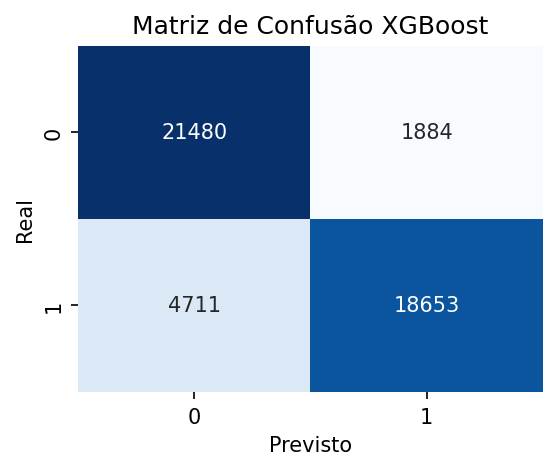

In [30]:
# Criando um gráfico da Matriz de Confusão do XGBoost

plt.figure(figsize=(4, 3))
sns.heatmap(cm_XGB, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão XGBoost")
plt.show()

In [ ]:
# buscando os melhores hiperparâmetros para o modelo XGBoost com o GridSearchCV

# importando a biblioteca
from sklearn.model_selection import GridSearchCV

# Definindo uma lista de valores para os parâmetros
param_grid = {
    'booster': ['gblinear', 'gbtree', 'dart'],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Criando o objeto GridSearchCV e ajustando os hiperparâmetros
classificador_XGB = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(classificador_XGB, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Imprimindo os melhores hiperparâmetros e a acurácia média do modelo
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Acurácia média do modelo:", grid_search.best_score_)

Melhores hiperparâmetros: {'booster': 'gbtree', 'learning_rate': 0.1}
Acurácia média do modelo: 0.8351132039675117


# **Random Forest**

In [31]:
# treinando o modelo com o Random Forest

# importando as bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador Random Forest
classificador_RF = RandomForestClassifier()

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 10  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com o Random Forest
resultado_RF = cross_validate(classificador_RF, X, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_RF = cross_val_predict(classificador_RF, X, y, cv=kf)
cm_RF = confusion_matrix(y, predicted_labels_RF)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_RF['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_RF['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_RF['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_RF['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_RF['test_accuracy'].mean()
mean_precision = resultado_RF['test_precision'].mean()
mean_recall = resultado_RF['test_recall'].mean()
mean_f1 = resultado_RF['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_RF = classificador_RF.get_params()
print(hiperparametros_RF)

Fold 1: acurácia = 0.8742
Fold 1: precisão = 0.9038
Fold 1: recall = 0.8362
Fold 1: F1 = 0.8687


Fold 2: acurácia = 0.8707
Fold 2: precisão = 0.9082
Fold 2: recall = 0.8272
Fold 2: F1 = 0.8658


Fold 3: acurácia = 0.8697
Fold 3: precisão = 0.8987
Fold 3: recall = 0.8328
Fold 3: F1 = 0.8645


Fold 4: acurácia = 0.8707
Fold 4: precisão = 0.8955
Fold 4: recall = 0.8433
Fold 4: F1 = 0.8686


Fold 5: acurácia = 0.8842
Fold 5: precisão = 0.9173
Fold 5: recall = 0.8469
Fold 5: F1 = 0.8807


Fold 6: acurácia = 0.8791
Fold 6: precisão = 0.9068
Fold 6: recall = 0.8491
Fold 6: F1 = 0.8770


Fold 7: acurácia = 0.8740
Fold 7: precisão = 0.9049
Fold 7: recall = 0.8355
Fold 7: F1 = 0.8688


Fold 8: acurácia = 0.8774
Fold 8: precisão = 0.8964
Fold 8: recall = 0.8493
Fold 8: F1 = 0.8722


Fold 9: acurácia = 0.8750
Fold 9: precisão = 0.9094
Fold 9: recall = 0.8332
Fold 9: F1 = 0.8696


Fold 10: acurácia = 0.8686
Fold 10: precisão = 0.8890
Fold 10: recall = 0.8343
Fold 10: F1 = 0.8608


Acurácia Média: 

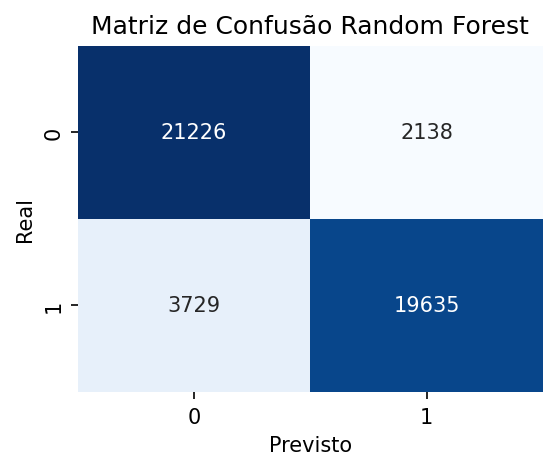

In [32]:
# Criando um gráfico da Matriz de Confusão para o Random Forest

plt.figure(figsize=(4, 3))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Random Forest")
plt.show()


In [ ]:
# buscando os melhores hiperparâmetros para o modelo Random Forest com o GridSearchCV

# importando a biblioteca
from sklearn.model_selection import GridSearchCV

# Definindo uma lista de valores para max_features e max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

# Criando o objeto GridSearchCV e ajustando os hiperparâmetros
classificador_RF = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(classificador_RF, param_grid=param_grid, cv=5)
grid_search.fit(X,y)

# Imprimindo os melhores hiperparâmetros e a acurácia média do modelo
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Acurácia média do modelo:", grid_search.best_score_)

Melhores hiperparâmetros: {'max_features': 'sqrt', 'n_estimators': 200}
Acurácia média do modelo: 0.8594879341118915


# **Naive Bayes**

In [ ]:
# treinando com o modelo Naive Bayes

# importando as bibliotecas
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador Naive Bayes
classificador_NB = BernoulliNB()

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 10  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com o Naive Bayes
resultado_NB = cross_validate(classificador_NB, X, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_NB = cross_val_predict(classificador_NB, X, y, cv=kf)
cm_NB = confusion_matrix(y, predicted_labels_NB)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_NB['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_NB['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_NB['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_NB['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_NB['test_accuracy'].mean()
mean_precision = resultado_NB['test_precision'].mean()
mean_recall = resultado_NB['test_recall'].mean()
mean_f1 = resultado_NB['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_NB = classificador_NB.get_params()
print(hiperparametros_NB)

Fold 1: acurácia = 0.6893
Fold 1: precisão = 0.7981
Fold 1: recall = 0.5030
Fold 1: F1 = 0.6171


Fold 2: acurácia = 0.7053
Fold 2: precisão = 0.8189
Fold 2: recall = 0.5335
Fold 2: F1 = 0.6461


Fold 3: acurácia = 0.7092
Fold 3: precisão = 0.8129
Fold 3: recall = 0.5420
Fold 3: F1 = 0.6504


Fold 4: acurácia = 0.6953
Fold 4: precisão = 0.8138
Fold 4: recall = 0.5169
Fold 4: F1 = 0.6322


Fold 5: acurácia = 0.7025
Fold 5: precisão = 0.8248
Fold 5: recall = 0.5212
Fold 5: F1 = 0.6388


Fold 6: acurácia = 0.6978
Fold 6: precisão = 0.8147
Fold 6: recall = 0.5242
Fold 6: F1 = 0.6379


Fold 7: acurácia = 0.7051
Fold 7: precisão = 0.8117
Fold 7: recall = 0.5336
Fold 7: F1 = 0.6439


Fold 8: acurácia = 0.7049
Fold 8: precisão = 0.8084
Fold 8: recall = 0.5258
Fold 8: F1 = 0.6372


Fold 9: acurácia = 0.7080
Fold 9: precisão = 0.8282
Fold 9: recall = 0.5257
Fold 9: F1 = 0.6431


Fold 10: acurácia = 0.7014
Fold 10: precisão = 0.7868
Fold 10: recall = 0.5305
Fold 10: F1 = 0.6338


Acurácia Média: 

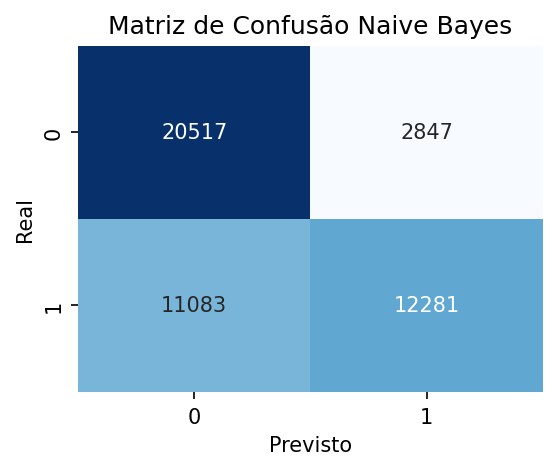

In [ ]:
# Criando um gráfico da Matriz de Confusão para o Naive Bayes

plt.figure(figsize=(4, 3))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Naive Bayes")
plt.show()

# **Regressão Logística**

In [ ]:
# treinando com o modelo Regressão Logística

# importando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador Logistic Regression
classificador_LR = LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')

# padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 10  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com a Regressão Logística
resultado_LR = cross_validate(classificador_LR, X_padronizado, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_LR = cross_val_predict(classificador_LR, X, y, cv=kf)
cm_LR = confusion_matrix(y, predicted_labels_LR)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_LR['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_LR['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_LR['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_LR['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_LR['test_accuracy'].mean()
mean_precision = resultado_LR['test_precision'].mean()
mean_recall = resultado_LR['test_recall'].mean()
mean_f1 = resultado_LR['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_LR = classificador_LR.get_params()
print(hiperparametros_LR)

Fold 1: acurácia = 0.8213
Fold 1: precisão = 0.9191
Fold 1: recall = 0.7029
Fold 1: F1 = 0.7966


Fold 2: acurácia = 0.8303
Fold 2: precisão = 0.9301
Fold 2: recall = 0.7173
Fold 2: F1 = 0.8100


Fold 3: acurácia = 0.8260
Fold 3: precisão = 0.9112
Fold 3: recall = 0.7217
Fold 3: F1 = 0.8055


Fold 4: acurácia = 0.8286
Fold 4: precisão = 0.9183
Fold 4: recall = 0.7264
Fold 4: F1 = 0.8111


Fold 5: acurácia = 0.8331
Fold 5: precisão = 0.9321
Fold 5: recall = 0.7218
Fold 5: F1 = 0.8136


Fold 6: acurácia = 0.8314
Fold 6: precisão = 0.9338
Fold 6: recall = 0.7189
Fold 6: F1 = 0.8124


Fold 7: acurácia = 0.8224
Fold 7: precisão = 0.9202
Fold 7: recall = 0.7058
Fold 7: F1 = 0.7988


Fold 8: acurácia = 0.8297
Fold 8: precisão = 0.9142
Fold 8: recall = 0.7221
Fold 8: F1 = 0.8069


Fold 9: acurácia = 0.8219
Fold 9: precisão = 0.9274
Fold 9: recall = 0.6989
Fold 9: F1 = 0.7971


Fold 10: acurácia = 0.8211
Fold 10: precisão = 0.9090
Fold 10: recall = 0.7029
Fold 10: F1 = 0.7928


Acurácia Média: 

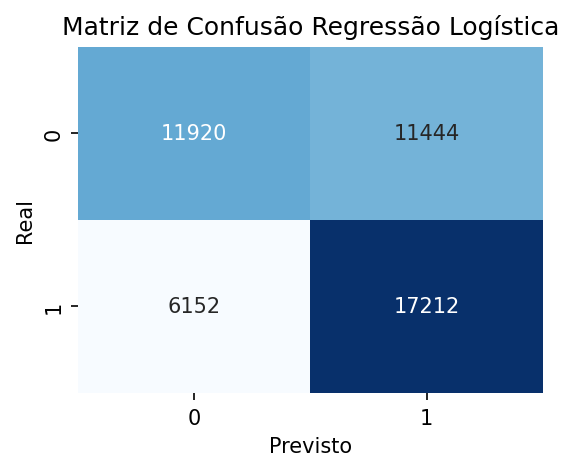

In [ ]:
# Criando um gráfico da Matriz de Confusão para a Regressão Logística

plt.figure(figsize=(4, 3))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Regressão Logística")
plt.show()

# **Rede neural Multi Layer Perceptron MLP**

In [ ]:
# treinando com o modelo de rede neural Multi Layer Perceptron (MLP)

# importando as bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador Multi Layer Perceptron (MLP)
classificador_MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu', random_state=42)

# padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 5  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com a rede neural MLP
resultado_MLP = cross_validate(classificador_MLP, X_padronizado, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_MLP = cross_val_predict(classificador_MLP, X, y, cv=kf)
cm_MLP = confusion_matrix(y, predicted_labels_MLP)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_MLP['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_MLP['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_MLP['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_MLP['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_MLP['test_accuracy'].mean()
mean_precision = resultado_MLP['test_precision'].mean()
mean_recall = resultado_MLP['test_recall'].mean()
mean_f1 = resultado_MLP['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_MLP = classificador_MLP.get_params()
print(hiperparametros_MLP)

Fold 1: acurácia = 0.8286
Fold 1: precisão = 0.8707
Fold 1: recall = 0.7725
Fold 1: F1 = 0.8187


Fold 2: acurácia = 0.8256
Fold 2: precisão = 0.8372
Fold 2: recall = 0.8109
Fold 2: F1 = 0.8238


Fold 3: acurácia = 0.8174
Fold 3: precisão = 0.8039
Fold 3: recall = 0.8455
Fold 3: F1 = 0.8241


Fold 4: acurácia = 0.8295
Fold 4: precisão = 0.8678
Fold 4: recall = 0.7744
Fold 4: F1 = 0.8185


Fold 5: acurácia = 0.8172
Fold 5: precisão = 0.8280
Fold 5: recall = 0.7950
Fold 5: F1 = 0.8111


Acurácia Média: 0.8237
Precisão Média: 0.8415
Revocação Média: 0.7997
F1 Médio: 0.8193


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'v

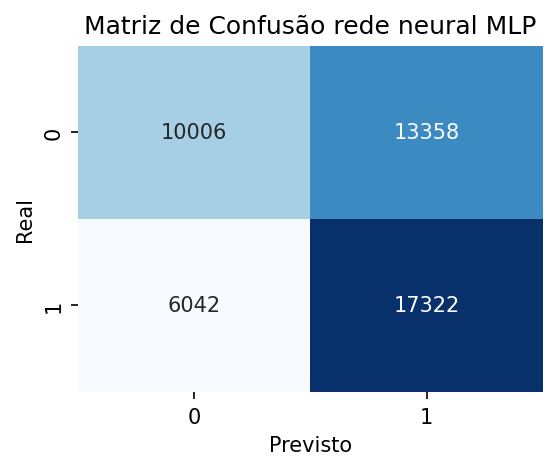

In [ ]:
# Criando um gráfico da Matriz de Confusão para a rede neural MLP

plt.figure(figsize=(4, 3))
sns.heatmap(cm_MLP, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão rede neural MLP")
plt.show()

In [ ]:
# retreinando com o modelo de rede neural Multi Layer Perceptron (MLP) com 4 camadas ocultas

# importando as bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# criando o objeto com o classificador Multi Layer Perceptron (MLP)
classificador_MLP = MLPClassifier(hidden_layer_sizes=(100, 50, 30, 20), max_iter=1000, activation='relu', random_state=42)

# padronizando os dados
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Definindo as métricas de avaliação
scoring = ['accuracy', 'precision', 'recall', 'f1']

# configurando a validação cruzada
k = 5  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cross validate com a rede neural MLP
resultado_MLP = cross_validate(classificador_MLP, X_padronizado, y, cv = kf, scoring=scoring)

# Usando cross_val_predict para obter as previsões do modelo para cada fold
predicted_labels_MLP = cross_val_predict(classificador_MLP, X, y, cv=kf)
cm_MLP = confusion_matrix(y, predicted_labels_MLP)

# exibindo os resultados dos folds
for fold in range(1, k + 1):
    print(f"Fold {fold}: acurácia = {resultado_MLP['test_accuracy'][fold - 1]:.4f}")
    print(f"Fold {fold}: precisão = {resultado_MLP['test_precision'][fold - 1]:.4f}")
    print(f"Fold {fold}: recall = {resultado_MLP['test_recall'][fold - 1]:.4f}")
    print(f"Fold {fold}: F1 = {resultado_MLP['test_f1'][fold - 1]:.4f}")
    print("\n")

# Calcular a média das métricas de desempenho
mean_accuracy = resultado_MLP['test_accuracy'].mean()
mean_precision = resultado_MLP['test_precision'].mean()
mean_recall = resultado_MLP['test_recall'].mean()
mean_f1 = resultado_MLP['test_f1'].mean()

print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Precisão Média: {mean_precision:.4f}")
print(f"Revocação Média: {mean_recall:.4f}")
print(f"F1 Médio: {mean_f1:.4f}")
print("\n")

# visualizando os hiperparâmetros default
hiperparametros_MLP = classificador_MLP.get_params()
print(hiperparametros_MLP)

Fold 1: acurácia = 0.8263
Fold 1: precisão = 0.8404
Fold 1: recall = 0.8065
Fold 1: F1 = 0.8231


Fold 2: acurácia = 0.8149
Fold 2: precisão = 0.8184
Fold 2: recall = 0.8121
Fold 2: F1 = 0.8152


Fold 3: acurácia = 0.8268
Fold 3: precisão = 0.8308
Fold 3: recall = 0.8260
Fold 3: F1 = 0.8284


Fold 4: acurácia = 0.8211
Fold 4: precisão = 0.8340
Fold 4: recall = 0.7984
Fold 4: F1 = 0.8158


Fold 5: acurácia = 0.8251
Fold 5: precisão = 0.8578
Fold 5: recall = 0.7742
Fold 5: F1 = 0.8139


Acurácia Média: 0.8228
Precisão Média: 0.8363
Revocação Média: 0.8034
F1 Médio: 0.8193


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50, 30, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.

# **Modelo para previsão de inadimplência para novos dados**

In [41]:
# Pedir ao usuário para inserir os novos dados e atribuir o valor de predição
# Lembrar que os atributos "EDUCATION" (educ_) e "MARRIAGE" (status_) deve ser preenchido no formato One Hot Encoder, ou seja, 0 ou 1

atributos = ["LIMIT_BAL", "SEX", "AGE", "PAY_1","PAY_2",
             "PAY_3", "PAY_4", "PAY_5", "PAY_6",
             "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
             "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
             "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
             "educ_medio", "educ_outros", "educ_pos", "educ_universitario",
             "status_casado", "status_outros", "status_solteiro"
]

novos_dados = []  # Crie uma lista para armazenar os novos dados

print("Insira os novos dados:")
for i, atributo in enumerate(atributos):
    valor = float(input(f"Valor para o atributo '{atributo}': "))
    novos_dados.append(valor)

# Transforme os novos dados em um array numpy
novos_dados = np.array(novos_dados).reshape(1, -1)

# Use o modelo Random Forest para fazer a previsão
model_for_predictions = RandomForestClassifier()  # Crie um novo modelo para fazer as previsões
model_for_predictions.fit(X, predicted_labels_RF)  # Treine o modelo com as previsões da validação cruzada
resultado = model_for_predictions.predict(novos_dados)

# Exiba o resultado
if resultado[0] == 0:
    print("adimplente")
else:
    print("inadimplente")


Insira os novos dados:
Valor para o atributo 'LIMIT_BAL': 500000
Valor para o atributo 'SEX': 1
Valor para o atributo 'AGE': 29
Valor para o atributo 'PAY_1': 0
Valor para o atributo 'PAY_2': 0
Valor para o atributo 'PAY_3': 0
Valor para o atributo 'PAY_4': 0
Valor para o atributo 'PAY_5': 0
Valor para o atributo 'PAY_6': 0
Valor para o atributo 'BILL_AMT1': 367965
Valor para o atributo 'BILL_AMT2': 412023
Valor para o atributo 'BILL_AMT3': 445007
Valor para o atributo 'BILL_AMT4': 542653
Valor para o atributo 'BILL_AMT5': 483003
Valor para o atributo 'BILL_AMT6': 473944
Valor para o atributo 'PAY_AMT1': 55000
Valor para o atributo 'PAY_AMT2': 40000
Valor para o atributo 'PAY_AMT3': 38000
Valor para o atributo 'PAY_AMT4': 20239
Valor para o atributo 'PAY_AMT5': 13750
Valor para o atributo 'PAY_AMT6': 13770
Valor para o atributo 'educ_medio': 0
Valor para o atributo 'educ_outros': 0
Valor para o atributo 'educ_pos': 1
Valor para o atributo 'educ_universitario': 0
Valor para o atributo '

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
